In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from pyspark.sql import SparkSession

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
spark = SparkSession.builder.getOrCreate ()

In [3]:
df = spark.read.csv("./analisis.csv", inferSchema=True, header=True)
df.show()

+---------------+---------+---------+---------+---------+---------+---------+---------+
|        usuario|       op|       co|       ex|       ag|       ne|wordcount|categoria|
+---------------+---------+---------+---------+---------+---------+---------+---------+
|   3gerardpique|34.297953|28.148819|41.948819|29.370315| 9.841575|  37.0945|        7|
|aguerosergiokun|44.986842|20.525865|37.938947|24.279098|10.362406|   78.797|        7|
| albertochicote|41.733854|13.745417|38.999896|34.645521| 8.836979|  49.2604|        4|
|  AlejandroSanz|40.377154|15.377462|52.337538|31.082154| 5.032231|  80.4538|        2|
| alfredocasero1|36.664677|19.642258|48.530806|31.138871| 7.305968|  47.0645|        4|
|    alo_oficial|33.531771|16.183958|43.211667|25.786667|11.930417|  40.1354|        7|
| andresiniesta8|31.851102|13.735591|47.182362|19.594331| 6.905591|  91.5197|        7|
| andykusnetzoff|31.865118| 16.58811|55.377559|36.258346| 7.464646|  66.2835|        5|
|    andyroddick|46.393488|25.45

In [4]:
df.describe().show()

23/09/15 14:03:42 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+
|summary|     usuario|                op|                co|               ex|               ag|               ne|         wordcount|         categoria|
+-------+------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+
|  count|         140|               140|               140|              140|              140|              140|               140|               140|
|   mean|        null|44.414590892857156|22.977135321428573|40.76442794285716|22.91852794285714| 8.00009776428571| 98.71548357142858|              4.05|
| stddev|        null| 8.425723174922995| 5.816851361251587|7.185246061054426|7.657121501990498|3.039248275538875|44.714070822234156|2.6588389308928924|
|    min|3gerardpique|         30.020465|          7.852756|        18.693542|    

In [5]:
grouped_df = df.groupBy("categoria").count()
grouped_df.show()

+---------+-----+
|categoria|count|
+---------+-----+
|        1|   27|
|        6|    8|
|        3|    9|
|        5|    4|
|        9|    6|
|        4|   19|
|        8|   16|
|        7|   17|
|        2|   34|
+---------+-----+



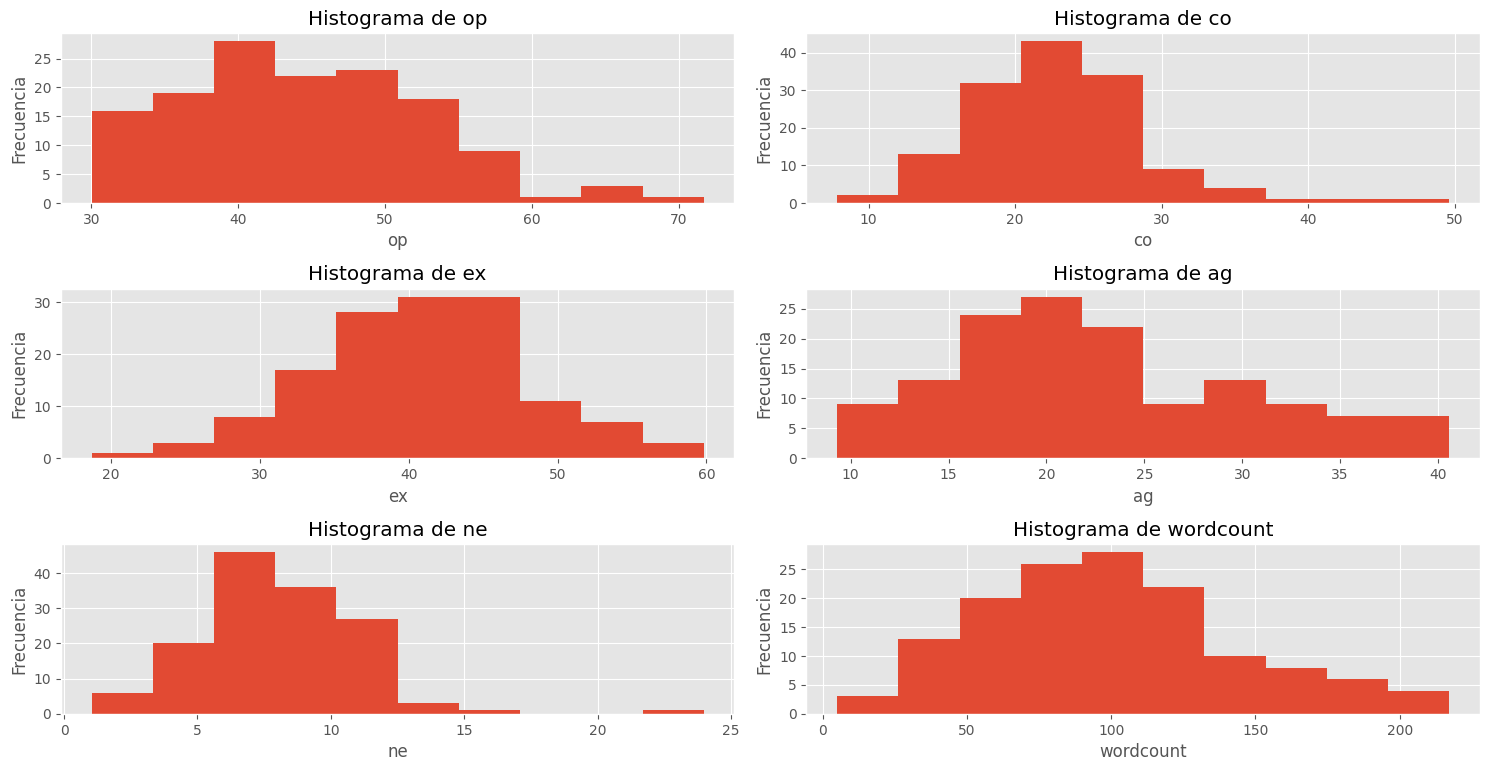

In [6]:
# Lista de nombres de columnas numéricas para las que deseas generar histogramas
columnas_numericas = df.drop("usuario", "categoria").columns
# Configura el diseño de subplots
num_filas = len(columnas_numericas)
num_columnas = 2

# Configura el tamaño de la figura
plt.figure(figsize=(15, 15))

# Itera sobre las columnas y crea histogramas
for i, columna_numerica in enumerate(columnas_numericas):
    # Selecciona la columna numérica
    data = df.select(columna_numerica).rdd.flatMap(lambda x: x).collect()
    
    # Crea un subplot
    plt.subplot(num_filas, num_columnas, i + 1)
    
    # Dibuja el histograma utilizando Matplotlib
    plt.hist(data, bins=10)  # Ajusta el número de bins según tus necesidades
    plt.xlabel(columna_numerica)
    plt.ylabel("Frecuencia")
    plt.title("Histograma de " + columna_numerica)

# Ajusta el espaciado entre subplots
plt.tight_layout()

# Muestra la figura
plt.show()

In [7]:
df_graph = df.toPandas()

/home/adair/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/adair/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/adair/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/adair/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

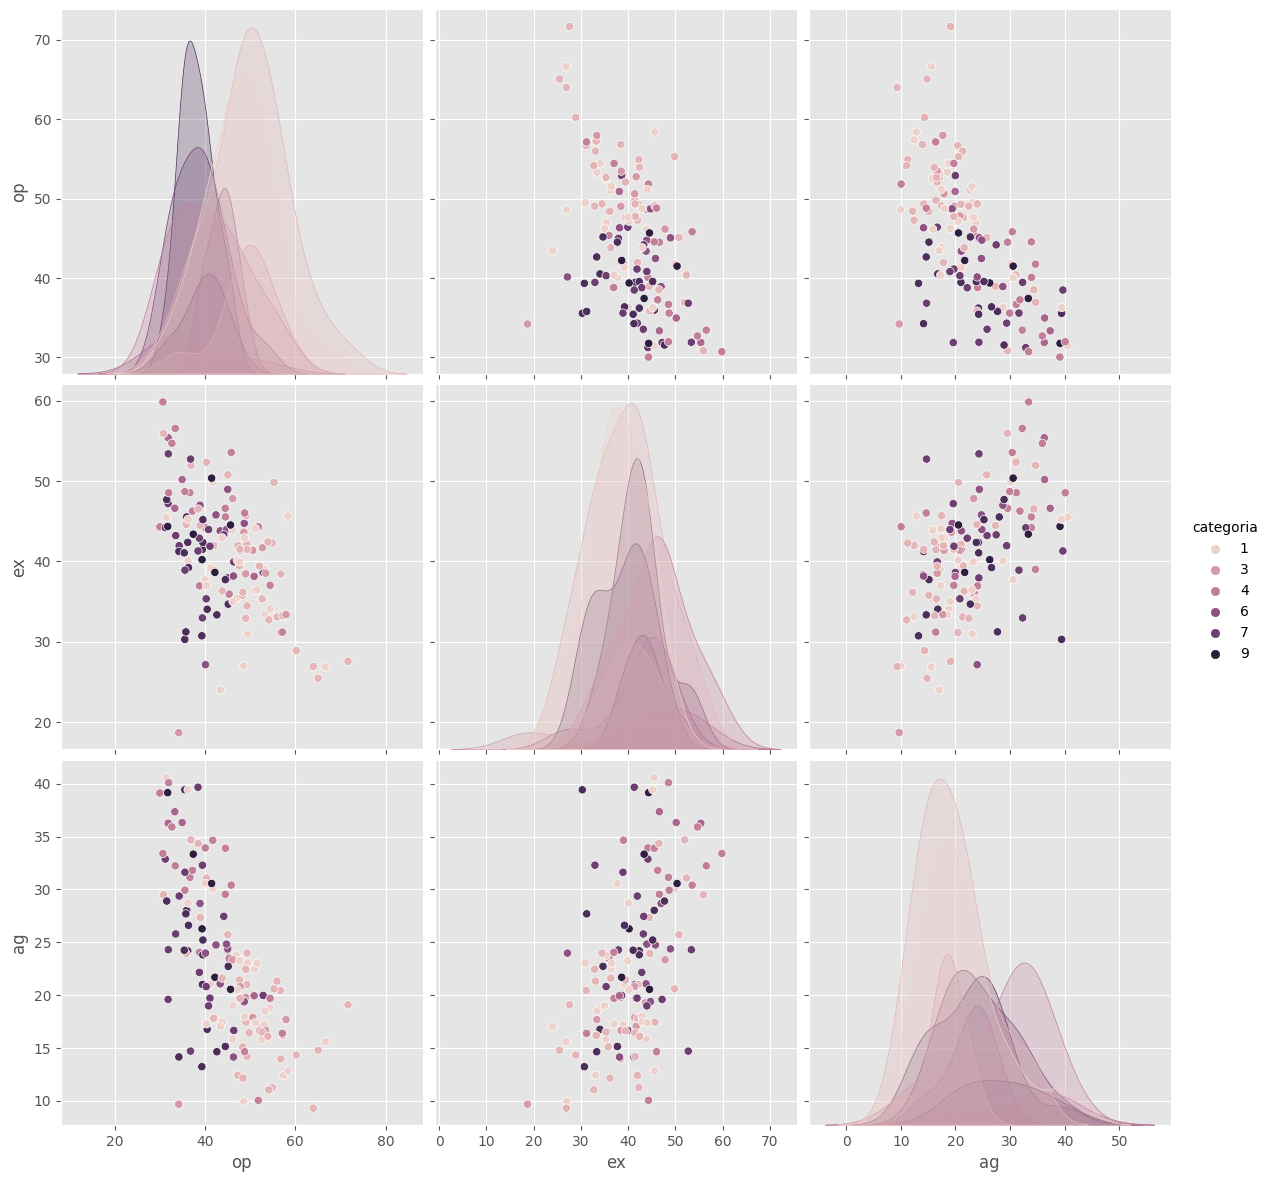

In [8]:
sb.pairplot(df_graph, hue='categoria',height=4,vars=["op","ex","ag"],kind='scatter')

In [9]:
df["op","ex","ag"].show()

+---------+---------+---------+
|       op|       ex|       ag|
+---------+---------+---------+
|34.297953|41.948819|29.370315|
|44.986842|37.938947|24.279098|
|41.733854|38.999896|34.645521|
|40.377154|52.337538|31.082154|
|36.664677|48.530806|31.138871|
|33.531771|43.211667|25.786667|
|31.851102|47.182362|19.594331|
|31.865118|55.377559|36.258346|
|46.393488| 39.93031|16.658062|
|39.436667|32.966288|32.291591|
|52.750992|41.698855|17.057176|
|41.328182|39.173333|21.070505|
|54.407727|34.104318|18.771818|
|47.610076|39.439545|21.438409|
|39.435149|41.479403|21.004104|
|48.617348|43.617955|19.263258|
|40.073543|44.194724|33.921417|
| 43.37292|43.792263|21.067737|
|49.792403|41.435581|16.433953|
|30.020465| 44.29969|39.117984|
+---------+---------+---------+
only showing top 20 rows



In [10]:
# Lista de nombres de las columnas que deseas convertir
columnas_a_convertir = ['op', 'ex', 'ag']

# Selecciona la columna y recopila los datos en una lista
op = df.select('op').rdd.flatMap(lambda x: x).collect()
ex = df.select('ex').rdd.flatMap(lambda x: x).collect()
ag = df.select('ag').rdd.flatMap(lambda x: x).collect()
cat = df.select("categoria").rdd.flatMap(lambda x: x).collect()

In [11]:
X = np.array([op,ex,ag])
y = np.array(cat)
X.shape

(3, 140)

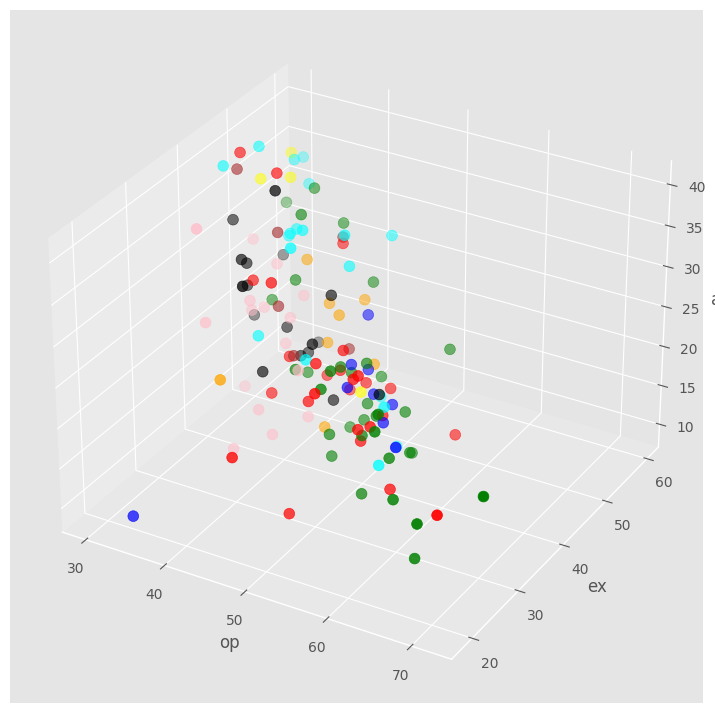

In [12]:
from mpl_toolkits.mplot3d import Axes3D

colores = ['blue', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown', 'purple']
asignar = [colores[i] for i in y]

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X[0, :], X[1, :], X[2, :], c=asignar, s=60)

ax.set_xlabel('op')
ax.set_ylabel('ex')
ax.set_zlabel('ag')

plt.show()

In [13]:
df_features = df.drop("categoria", "usuario", "co", "ne", "wordcount")
df_features.columns

['op', 'ex', 'ag']

In [14]:
from pyspark.ml.feature import VectorAssembler

if 'features' in df.columns:
    df = df.drop('features')

feature_cols = df_features.columns
vec_assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
df_to_use = vec_assembler.transform(df)

23/09/15 14:04:18 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


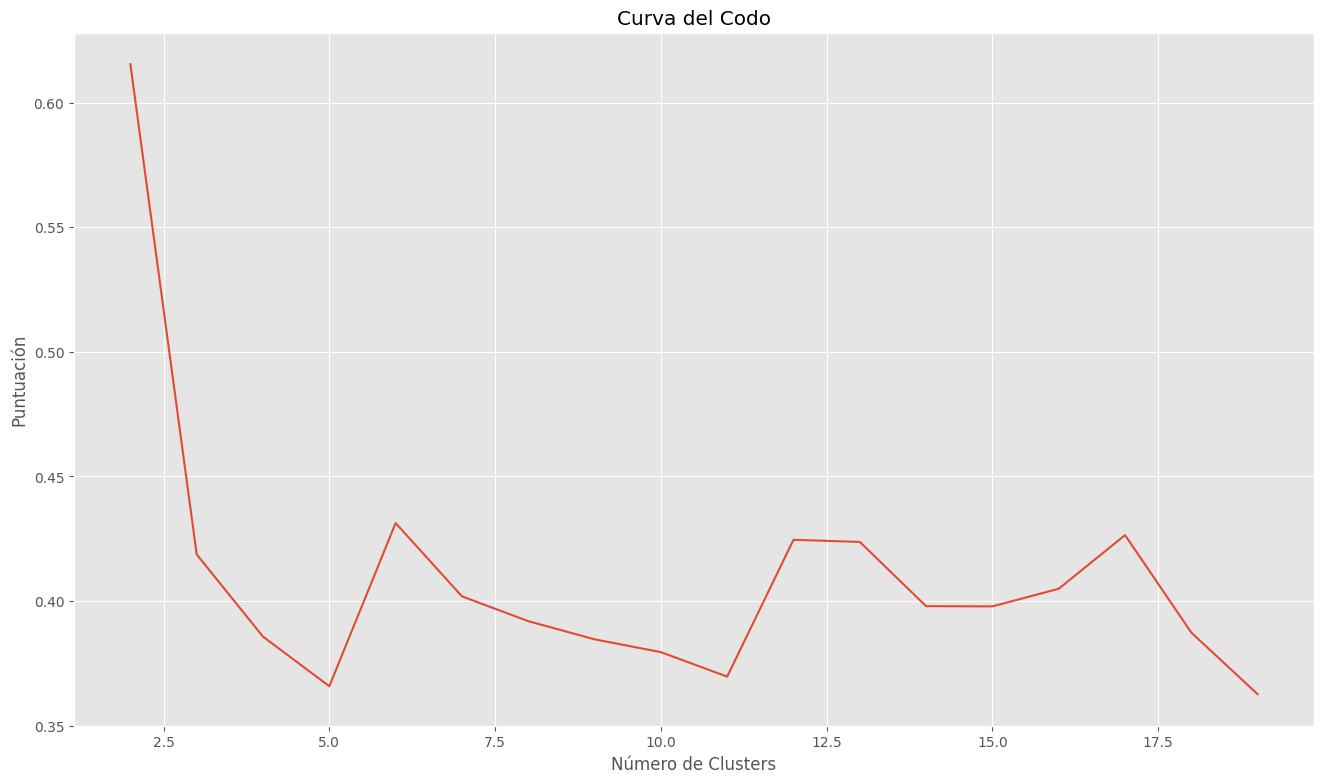

In [15]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

Nc = range(2, 20)
# Inicializa una lista de modelos KMeans y las puntuaciones correspondientes
kmeans_models = []
scores = []

for i in Nc:
    kmeans = KMeans().setK(i).setSeed(1).setFeaturesCol("features").setPredictionCol("prediction")
    model = kmeans.fit(df_to_use)
    kmeans_models.append(model)
    # Utiliza un Evaluator para calcular la puntuación (Silhouette Score en este caso)
    evaluator = ClusteringEvaluator()
    score = evaluator.evaluate(model.transform(df_to_use))
    scores.append(score)

# Grafica la curva del codo
plt.plot(Nc, scores)
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación')
plt.title('Curva del Codo')
plt.show()

In [16]:
# Crea el modelo K-Means
kmeans = KMeans().setK(5).setFeaturesCol('features')  # Establece el número de clústeres
model = kmeans.fit(df_to_use)

# Obtén los centroides de los clústeres
centroids = model.clusterCenters()

centroids = np.array(centroids)

In [17]:
prediction = model.transform(df_to_use)
predictions = prediction.select('prediction').rdd.flatMap(lambda x: x).collect()

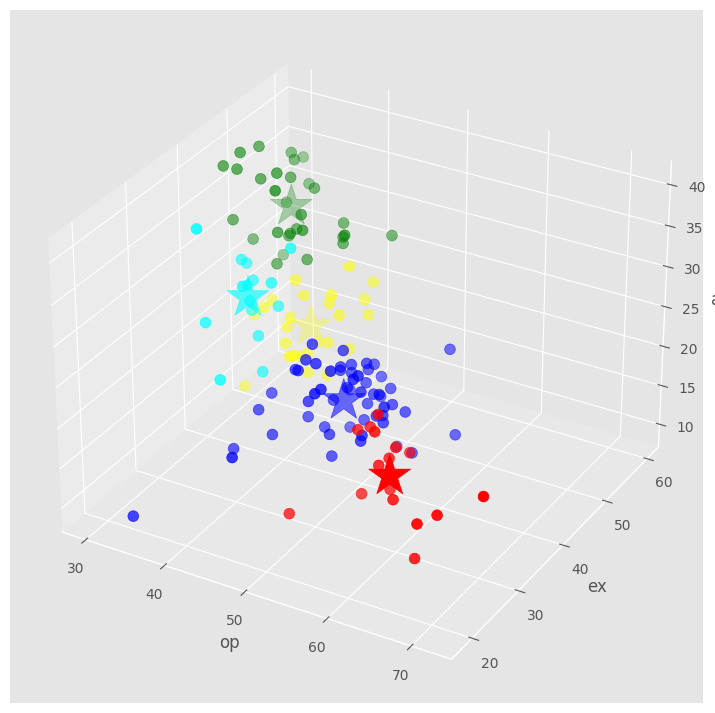

In [18]:

labels = predictions

C = centroids
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0, :], X[1, :], X[2, :], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

ax.set_xlabel('op')
ax.set_ylabel('ex')
ax.set_zlabel('ag')

plt.show()

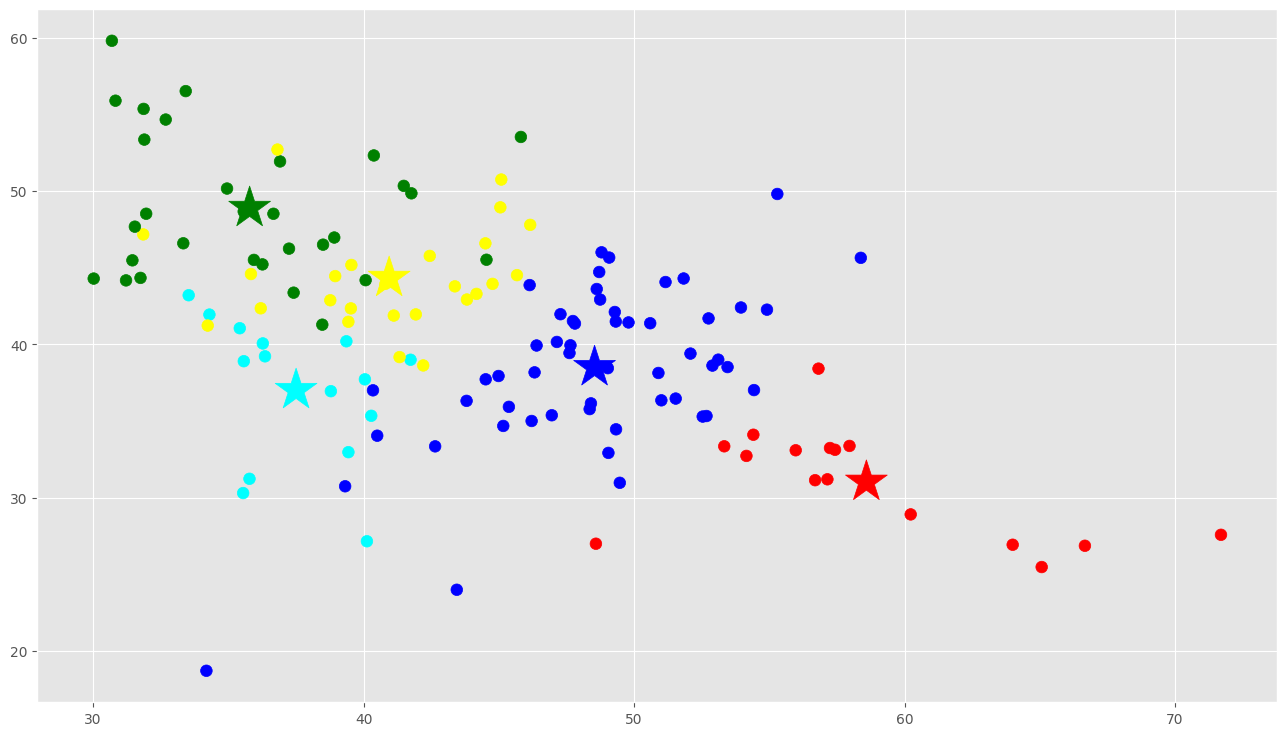

In [19]:
f1 = df.select('op').rdd.flatMap(lambda x: x).collect()
f2 = df.select('ex').rdd.flatMap(lambda x: x).collect()
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

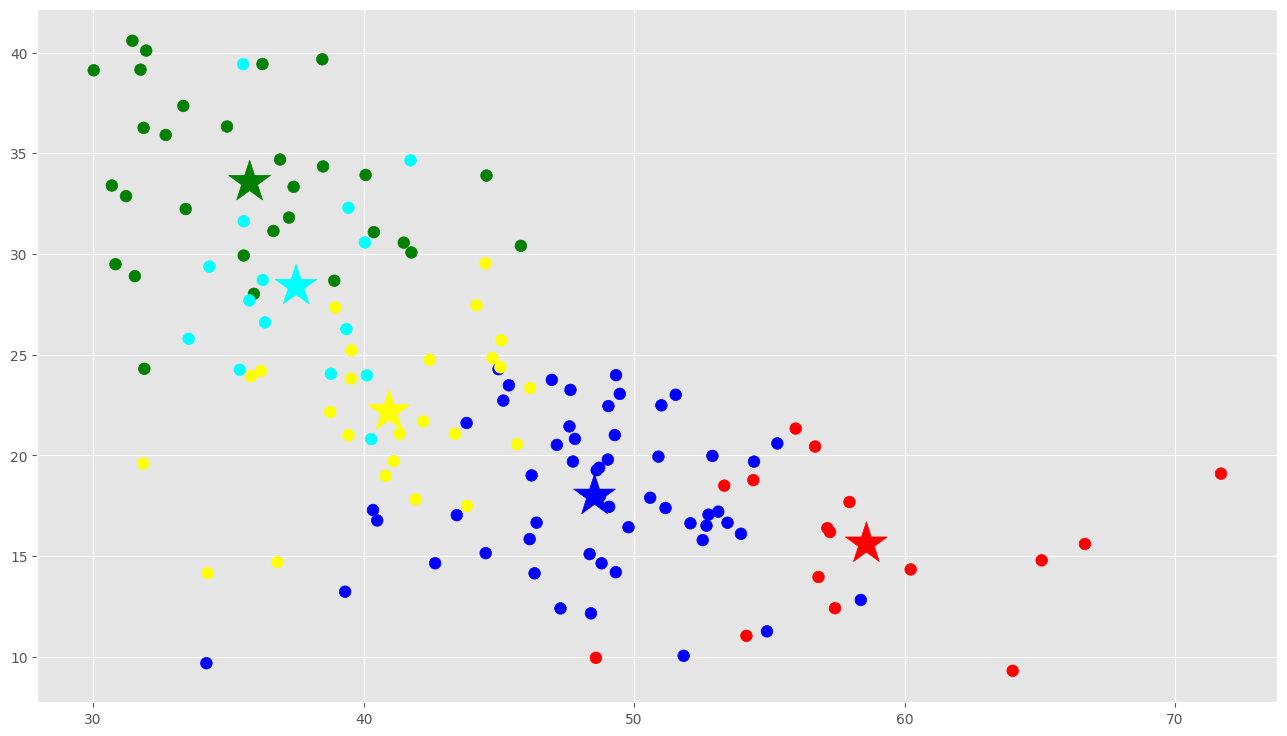

In [20]:
f1 = df.select('op').rdd.flatMap(lambda x: x).collect()
f2 = df.select('ag').rdd.flatMap(lambda x: x).collect()

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

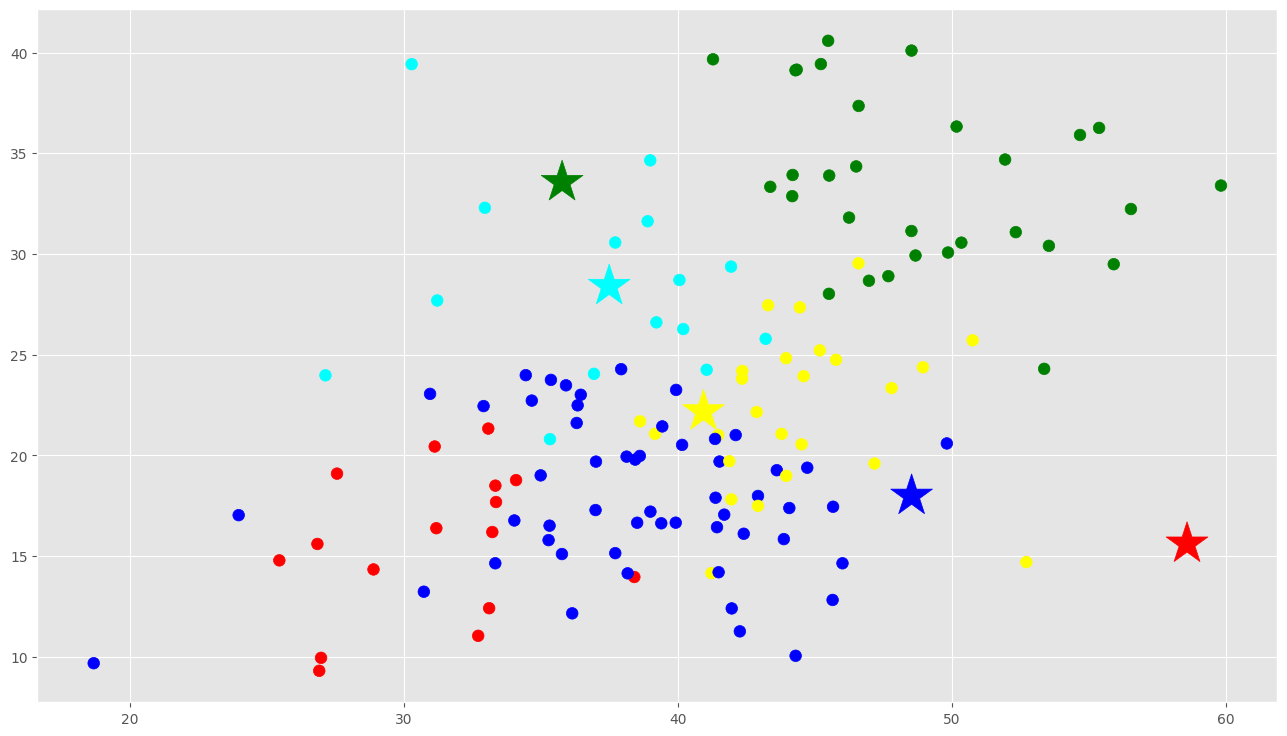

In [21]:
f1 = df.select('ex').rdd.flatMap(lambda x: x).collect()
f2 = df.select('ag').rdd.flatMap(lambda x: x).collect()

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [22]:
from pyspark.sql.functions import lit, count, monotonically_increasing_id, row_number
from pyspark.sql.types import IntegerType, StringType
from pyspark.sql.window import Window

df_labels = spark.createDataFrame(labels, IntegerType())

# Crear un nuevo DataFrame 'copy' con las columnas 'usuario', 'categoria' y 'label'
copy = df.select('usuario', 'categoria')

window_spec = Window.orderBy(lit(0))  # Ventana de ordenamiento vacía
df_labels = df_labels.withColumn("id", row_number().over(window_spec))
copy = copy.withColumn("id", row_number().over(window_spec))

copy = copy.join(df_labels, on=["id"], how="inner").drop("id")
# Crear un nuevo DataFrame 'cantidadGrupo' con las columnas 'color' y 'cantidad'
cantidadGrupo = spark.createDataFrame(colores, StringType())

cantidadGrupo = copy.groupby('value').agg(count('*').alias('cantidad'))

# Muestra el DataFrame 'cantidadGrupo'
cantidadGrupo.show()

23/09/15 14:05:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/09/15 14:05:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/09/15 14:05:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/09/15 14:05:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/09/15 14:05:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/09/15 14:05:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/09/15 1

+-----+--------+
|value|cantidad|
+-----+--------+
|    3|      15|
|    2|      54|
|    1|      30|
|    4|      25|
|    0|      16|
+-----+--------+



In [37]:
from collections import Counter

# Usa Counter para contar los elementos y agruparlos en un diccionario
conteo = Counter(labels)

elementos = []
frecuencias = []

# El resultado es un diccionario donde las claves son los elementos únicos y los valores son las frecuencias
for elemento, frecuencia in conteo.items():
    elementos.append(elemento)
    frecuencias.append(frecuencia)
    print(f"Elemento: {elemento}, Frecuencia: {frecuencia}")

Elemento: 3, Frecuencia: 15
Elemento: 2, Frecuencia: 54
Elemento: 1, Frecuencia: 30
Elemento: 4, Frecuencia: 25
Elemento: 0, Frecuencia: 16


In [38]:
frecuencias


[15, 54, 30, 25, 16]